# <center>Cricket Data analysis</center>

- > The data takes is based on cricket, Indian premier league(IPL) from 2008 to 2017.
Analyzing the given data and getting meaningful insights from it.


# Project WorkFlow
1. importing libraries
2. importing a data set
3. data preprocessing and cleaning
4. EDA - exploratory data analysis
5. Conclusions

In [ ]:
## importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Importing data set

match_df=pd.read_csv("/content/matches.csv")
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match_df.shape

(636, 18)

In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [ ]:
## let's check for missing values
match_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [ ]:
## since we have all null values in umpire colimn so we can drop it
match_df.drop('umpire3',axis=1,inplace=True)

In [ ]:
match_df.city.value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

In [ ]:
match_df.winner.value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [ ]:
match_df[match_df.isnull().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


In [ ]:
## it is most appropriate way to remove missing values is dropping all the rows of missing values
match_df.dropna(how='any',inplace=True)

In [ ]:
## descriptive statistics of numerical features
match_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,625.000000,625.000000,625.000000,625.000000,625.000000
mean,316.576000,2012.460800,0.025600,13.857600,3.395200
std,183.725158,2.782526,0.158065,24.069755,3.424877
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,158.000000,2010.000000,0.000000,0.000000,0.000000
50%,315.000000,2012.000000,0.000000,0.000000,4.000000
75%,478.000000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [ ]:
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [ ]:
match_df.shape

(625, 17)

# Exploratory Data Analysis

In [ ]:
un=match_df['team1'].unique()
un

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [ ]:
d={
    'Sunrisers Hyderabad':'Sunrisers Hyderabad',
    'Mumbai Indians':'Mumbai Indians', 
   'Gujarat Lions':'Gujarat Lions',
     'Kolkata Knight Riders':'Kolkata Knight Riders',
       'Royal Challengers Bangalore':'Royal Challengers Bangalore', 
   'Delhi Daredevils':'Delhi Daredevils',
       'Kings XI Punjab':'Kings XI Punjab',
    'Chennai Super Kings':'Chennai Super Kings',
    'Rajasthan Royals':'Rajasthan Royals',
       'Deccan Chargers':'Deccan Chargers', 
   'Kochi Tuskers Kerala':'Kochi Tuskers Kerala', 
   'Pune Warriors':'Pune Warriors',
       'Rising Pune Supergiants':"Rising Pune Supergiants",
    'Rising Pune Supergiant':"Rising Pune Supergiants"
}

match_df['team1']=match_df['team1'].map(d)
match_df['team2']=match_df['team2'].map(d)
match_df['toss_winner']=match_df['toss_winner'].map(d)
match_df['winner']=match_df['winner'].map(d)

In [ ]:
match_df['team2'].value_counts()

Delhi Daredevils               81
Royal Challengers Bangalore    80
Kolkata Knight Riders          80
Mumbai Indians                 74
Kings XI Punjab                70
Rajasthan Royals               62
Chennai Super Kings            53
Deccan Chargers                32
Sunrisers Hyderabad            30
Pune Warriors                  25
Gujarat Lions                  16
Rising Pune Supergiants        15
Kochi Tuskers Kerala            7
Name: team2, dtype: int64



---


- > Finding the team with more number of wins

Text(0.5, 0, 'Team')

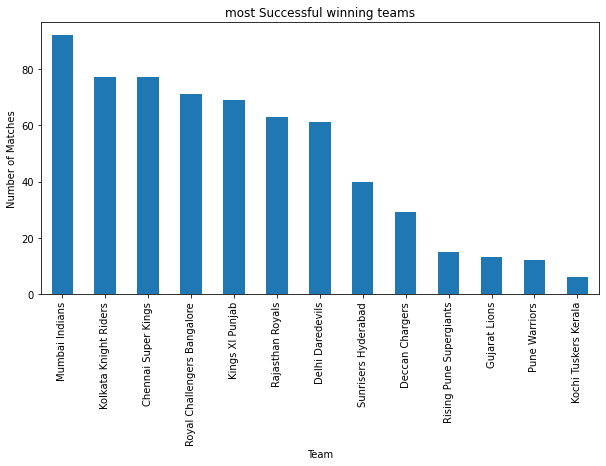

In [ ]:
## Plotting the bar plot to visualize maximum winning team 
plt.figure(figsize=(10,5))
match_df.winner.value_counts().sort_values(ascending=False).plot.bar()
plt.title("most Successful winning teams")
plt.ylabel("Number of Matches")
plt.xlabel("Team")


-  so 92 times mumbai indians won the match <br>
-  second most 77 times that is kolkata knight riders team



---


- > Finding most matches won by a team in each season



In [ ]:
pd.options.display.max_rows=100
match_df.groupby(['season'])['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                



*   In 2008 Rajasthan Royals won most number of matches. and won championship
*   In 2009 eventhough Delhi Daredevils won most matches but Deccan Chargers won championship
*   In 2010 Mumbai Indians won most matches but chennai super kings won championship
*   In 2011 Chennai Super Kings won most matches as well as championship
*   In 2012 Kolkata Knight Riders won most matches as well as championship
*   In 2013 Mumbai Indians won most matches as well as championship
*   In 2014 Kings XI Punjab and Kolkata Knight Riders won equal number of matches but kolkata Knight Riders won championship
*   In 2015 Mumbai Indians and chennai super kings won equal number of matches but Mumbai Indians won championship
*   In 2016 Sunrisers Hyderabad won most matches as well as championship
*   In 2017 Mumbai won most matches as well as championship.






*   So here Mumbai Indians is tha team who won more championship titles.





---


- > Most Number of matches played by a team



In [ ]:
match_df['team1'].value_counts() 

Mumbai Indians                 80
Kings XI Punjab                77
Chennai Super Kings            76
Kolkata Knight Riders          67
Royal Challengers Bangalore    67
Delhi Daredevils               61
Rajasthan Royals               54
Sunrisers Hyderabad            44
Deccan Chargers                43
Pune Warriors                  20
Rising Pune Supergiants        15
Gujarat Lions                  14
Kochi Tuskers Kerala            7
Name: team1, dtype: int64

In [ ]:
match_df['team2'].value_counts()

Delhi Daredevils               81
Royal Challengers Bangalore    80
Kolkata Knight Riders          80
Mumbai Indians                 74
Kings XI Punjab                70
Rajasthan Royals               62
Chennai Super Kings            53
Deccan Chargers                32
Sunrisers Hyderabad            30
Pune Warriors                  25
Gujarat Lions                  16
Rising Pune Supergiants        15
Kochi Tuskers Kerala            7
Name: team2, dtype: int64

In [ ]:
## adding the team1 and team we get total maches played by a team
(match_df['team1'].value_counts() + match_df['team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 154
Kings XI Punjab                147
Kolkata Knight Riders          147
Royal Challengers Bangalore    147
Delhi Daredevils               142
Chennai Super Kings            129
Rajasthan Royals               116
Deccan Chargers                 75
Sunrisers Hyderabad             74
Pune Warriors                   45
Gujarat Lions                   30
Rising Pune Supergiants         30
Kochi Tuskers Kerala            14
dtype: int64

Text(0, 0.5, 'Number of matches')

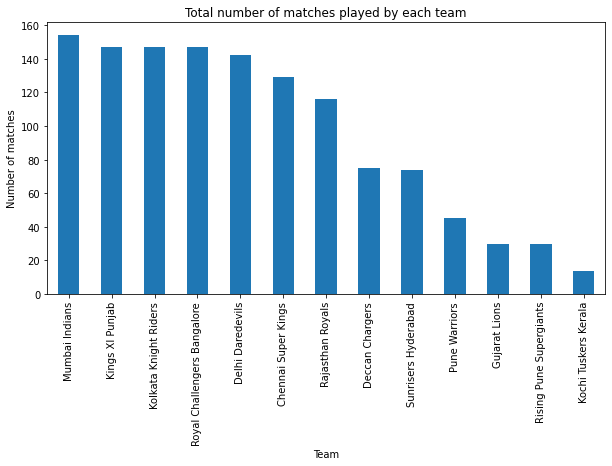

In [ ]:
## plotting to visualize no. matches played by a team
plt.figure(figsize=(10,5))
(match_df['team1'].value_counts() + match_df['team2'].value_counts()).sort_values(ascending=False).plot.bar()
plt.title("Total number of matches played by each team")
plt.xlabel("Team")
plt.ylabel("Number of matches")


- Mumbai indians played 154 matches that is highest matches played by a team
- Kings XI punjab, Kolkata Knight Riders and Royal Challengers banglore got the same positions as they played equal number of matches that is 147



---


- > Finding top 10 umpires who umpired most games

Text(0, 0.5, 'Number of matches')

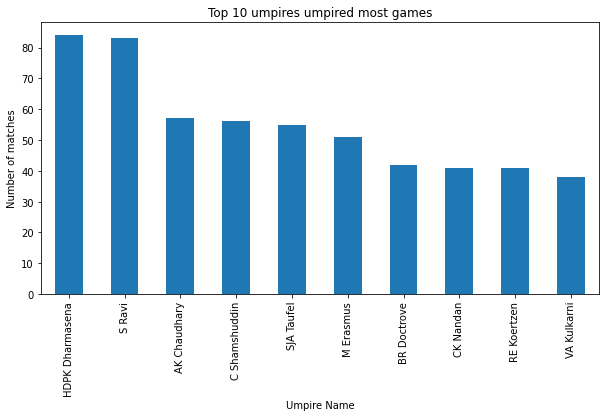

In [ ]:
plt.figure(figsize=(10,5))
(match_df['umpire1'].value_counts() + match_df['umpire2'].value_counts()).sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 umpires umpired most games")
plt.xlabel("Umpire Name")
plt.ylabel("Number of matches")

- As we see HDPK Dharmasena umpired more number of matches



---


- > Finding who got Maximum number of  man of the matches

Text(0, 0.5, 'Number of man of the matches')

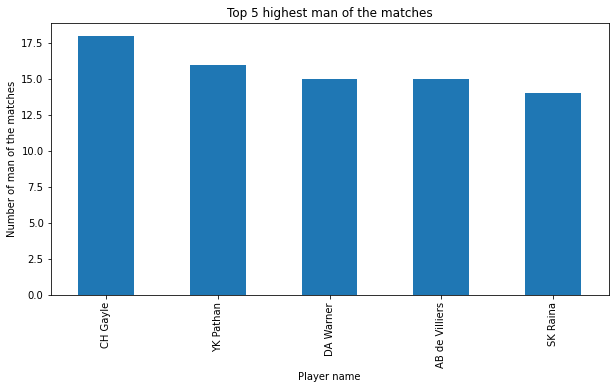

In [ ]:
plt.figure(figsize=(10,5))
match_df.player_of_match.value_counts().head().plot.bar()
plt.title("Top 5 highest man of the matches")
plt.xlabel("Player name")
plt.ylabel("Number of man of the matches")

- Gayle got the more man of the matches
- And after Gayle pathan is there



---


- > Finding the most frequent stadium/venue 

In [ ]:
match_df.venue.value_counts()

M Chinnaswamy Stadium                                   63
Eden Gardens                                            61
Feroz Shah Kotla                                        59
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

Text(0, 0.5, 'Number of matches')

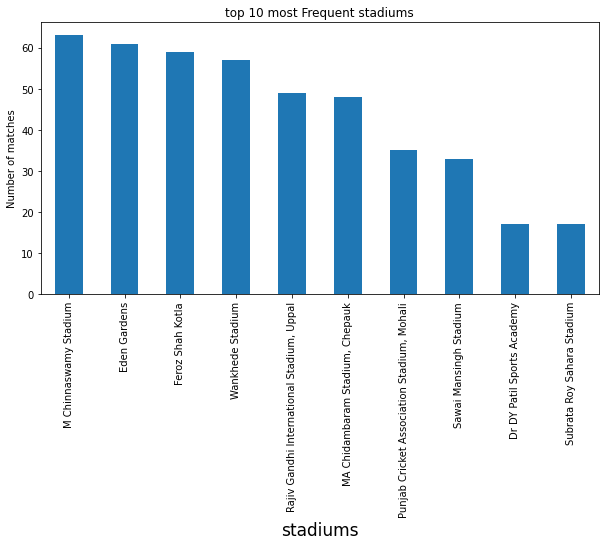

In [ ]:
##plotting the bar plot
plt.figure(figsize=(10,5))
match_df.venue.value_counts().head(10).plot(kind='bar')
plt.title("top 10 most Frequent stadiums")
plt.xlabel("stadiums",fontsize=17)
plt.ylabel("Number of matches")



---


- > Outcome of the games

In [ ]:
## Percentage of outcome
match_df.result.value_counts(normalize=True)

normal    0.9888
tie       0.0112
Name: result, dtype: float64

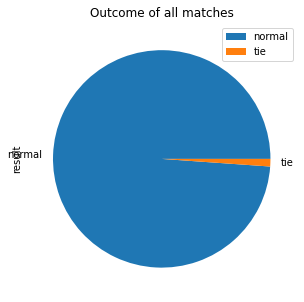

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Outcome of all matches")
match_df.result.value_counts().plot(kind='pie')
plt.legend()

- **98%** of games normal,&nbsp; **0.112%** of games tie and &nbsp;remaining **1.88%** is no Result. <br>
 NaN value is there as no result, as i removed NaN values so it is not visible.

- > Finding How many matches tied

In [ ]:
match_df[match_df.result=='tie']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi


In [ ]:
len(match_df[match_df.result=='tie'])

7

- we have Only **7** tie matches there.





---


- > Finding winners based on their toss decision

In [ ]:
match_df.groupby(['winner'])['toss_decision'].value_counts()

winner                       toss_decision
Chennai Super Kings          bat              49
                             field            28
Deccan Chargers              field            15
                             bat              14
Delhi Daredevils             field            34
                             bat              27
Gujarat Lions                field            11
                             bat               2
Kings XI Punjab              field            49
                             bat              20
Kochi Tuskers Kerala         field             6
Kolkata Knight Riders        field            43
                             bat              34
Mumbai Indians               field            51
                             bat              41
Pune Warriors                bat               9
                             field             3
Rajasthan Royals             field            33
                             bat              30
Rising Pune Supergiants   

Text(0, 0.5, 'Number of winning matches')

<Figure size 864x432 with 0 Axes>

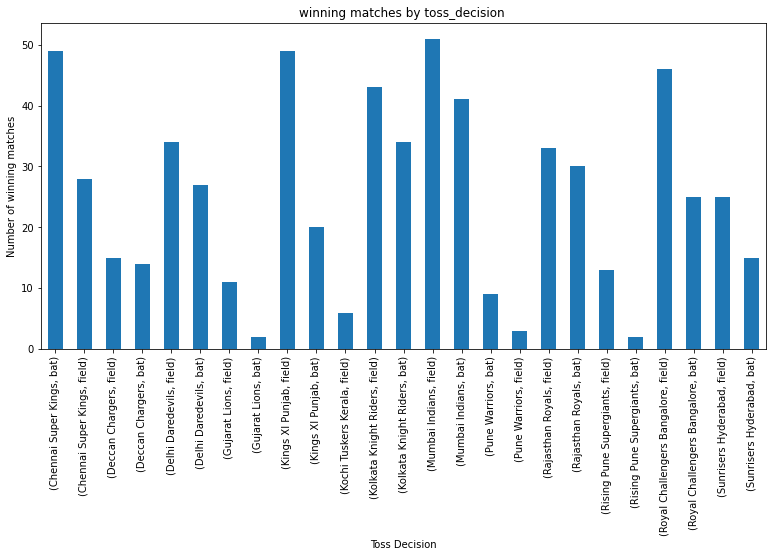

In [ ]:
## plotting bar plot 

plt.figure(figsize=(12,6))
plt.figure(figsize=(13,6))
match_df.groupby(['winner'])['toss_decision'].value_counts().plot.bar()
plt.title("winning matches by toss_decision ")
plt.xlabel('Toss Decision')
plt.ylabel("Number of winning matches")

- **Chennai super kings** won most of the matches when they choose toss_decision is *batting*.
- And **Mumbai Indians** won most of the matches when they decided to *field* first.



---


- > Finding who won most of the matches based on toss_decision (batting or fielding)

In [ ]:
match_df.groupby([match_df['toss_decision']=='bat'])['winner'].value_counts()

toss_decision  winner                     
False          Mumbai Indians                 51
               Kings XI Punjab                49
               Royal Challengers Bangalore    46
               Kolkata Knight Riders          43
               Delhi Daredevils               34
               Rajasthan Royals               33
               Chennai Super Kings            28
               Sunrisers Hyderabad            25
               Deccan Chargers                15
               Rising Pune Supergiants        13
               Gujarat Lions                  11
               Kochi Tuskers Kerala            6
               Pune Warriors                   3
True           Chennai Super Kings            49
               Mumbai Indians                 41
               Kolkata Knight Riders          34
               Rajasthan Royals               30
               Delhi Daredevils               27
               Royal Challengers Bangalore    25
               Kings XI Pu

In [ ]:
match_df.groupby([match_df['toss_decision']=='field'])['winner'].value_counts()

toss_decision  winner                     
False          Chennai Super Kings            49
               Mumbai Indians                 41
               Kolkata Knight Riders          34
               Rajasthan Royals               30
               Delhi Daredevils               27
               Royal Challengers Bangalore    25
               Kings XI Punjab                20
               Sunrisers Hyderabad            15
               Deccan Chargers                14
               Pune Warriors                   9
               Gujarat Lions                   2
               Rising Pune Supergiants         2
True           Mumbai Indians                 51
               Kings XI Punjab                49
               Royal Challengers Bangalore    46
               Kolkata Knight Riders          43
               Delhi Daredevils               34
               Rajasthan Royals               33
               Chennai Super Kings            28
               Sunrisers H

- when toss decision is *fielding* **mumbai Indians** won most of the matches.
and when toss decision is *batting* **Chennai super kings** won most of the matches.



---

- > Finding How many matches won by runs

In [ ]:
len(match_df.groupby(['win_by_runs'])['winner'].value_counts().sort_values(ascending=False))

244



---
- > Finding how many matches won by wickets


In [ ]:
len(match_df.groupby(['win_by_wickets'])['winner'].value_counts().sort_values(ascending=False))

102



---


- > Finding winning percentage of each team

In [ ]:
winner=match_df['winner'].value_counts()

playedteams=(match_df['team1'].value_counts() + match_df['team2'].value_counts()).sort_values(ascending=False)


l=['Mumbai Indians','Kolkata Knight Riders' ,'Chennai Super Kings' ,'Royal Challengers Bangalore' , 'Kings XI Punjab','Rajasthan Royals','Delhi Daredevils' ,'Sunrisers Hyderabad','Deccan Chargers','Rising Pune Supergiants' , 'Gujarat Lions' , 'Pune Warriors', 'Kochi Tuskers Kerala']
## winning percentage
d={}
for i in l:
  perc=(winner[i]/playedteams[i])*100
  d[i]=perc
d

{'Chennai Super Kings': 59.68992248062015,
 'Deccan Chargers': 38.666666666666664,
 'Delhi Daredevils': 42.95774647887324,
 'Gujarat Lions': 43.333333333333336,
 'Kings XI Punjab': 46.93877551020408,
 'Kochi Tuskers Kerala': 42.857142857142854,
 'Kolkata Knight Riders': 52.38095238095239,
 'Mumbai Indians': 59.74025974025974,
 'Pune Warriors': 26.666666666666668,
 'Rajasthan Royals': 54.310344827586206,
 'Rising Pune Supergiants': 50.0,
 'Royal Challengers Bangalore': 48.29931972789115,
 'Sunrisers Hyderabad': 54.054054054054056}

In [ ]:
w=pd.DataFrame(d,index=[1])
w

,Mumbai Indians,Kolkata Knight Riders,Chennai Super Kings,Royal Challengers Bangalore,Kings XI Punjab,Rajasthan Royals,Delhi Daredevils,Sunrisers Hyderabad,Deccan Chargers,Rising Pune Supergiants,Gujarat Lions,Pune Warriors,Kochi Tuskers Kerala
1,59.74026,52.380952,59.689922,48.29932,46.938776,54.310345,42.957746,54.054054,38.666667,50.0,43.333333,26.666667,42.857143


In [ ]:
w=w.transpose()

In [ ]:
w=w.rename(columns={1:'Percentage of winning'})
w

,Percentage of winning
Mumbai Indians,59.740260
Kolkata Knight Riders,52.380952
Chennai Super Kings,59.689922
Royal Challengers Bangalore,48.299320
Kings XI Punjab,46.938776
Rajasthan Royals,54.310345
Delhi Daredevils,42.957746
Sunrisers Hyderabad,54.054054
Deccan Chargers,38.666667
Rising Pune Supergiants,50.000000


- we got winning percentage of each team 

- Found that Mumbai Indians and Chennai super kings have more winning percentage





---



#Conclusions



- > Top 5 most winning teams
  - Mumbai Indians - 92
  - Kolkata Knight Riders - 77
  - Chennai Super Kings - 77
  - Royal Challengers Bangalore - 71
  - Kings XI Punjab - 69
- > Mumbai Indians won Highest(3) championship titles
  - 2013
  - 2015
  - 2017
- > Top most matches played by a team are
  - Mumbai Indians- 154
  - Kolkata Knight Riders- 147
  - Royal Challengers Bangalore - 147
  - Kings XI Punjab - 147
- > Top Most Umpires
  - HDPK Dharmasena - 84.0
  - S Ravi - 83.0
  - AK Chaudhary - 57.0
  - C Shamshuddin - 56.0
  - SJA Taufel - 55.0
- > Top  5 man of the match winners are
  - Chris Gayle - 18 
  - YK Pathan - 16
  - DA Warner - 15
  - AB de Villiers - 15
  - SK Raina - 14
- > Most frequent stadiums are 
   -  M Chinnaswamy Stadium                                   
   - Eden Gardens                                            
   - Feroz Shah Kotla                                        
   - Wankhede Stadium                                       
   - Rajiv Gandhi International Stadium, Uppal
- > Outcome of Games
   - 98% of games normal result.
   - 0.112% of games tie.
   - 1.88% is no Result.

- > 102 matches won by wickets.
- > 244 matches won by runs.
- > We found that very less chances for match to be tie or no result.
- > **Chennai Super Kings** won *Highest(49)* number of matches when they chosen toss decision as *batting* in other hand **Mumbai Indians** won *Highest(51)* number of matches when they chosen toss decision as *fielding*.
- > We found that **Mumbai Indians and chennai Super Kings** has top two highest winning percentage of all that is **59.74 & 59.68 respectively**.